# Problema de Sitnikov
#### Integrantes
* García Fragoso Ángeles / Angeles GF
* López Solís Luz Rebeca / RebeLopez
* Martínez García Ana Sofía / Anasof-Martinez
* Mosso Mendoza Evelyn Abigail / AbiiMosso

# Campo vectorial de los tres cuerpos

$$\ddot{\vec{r}}_{1} = \dot{\vec{V}}_{1} = -G \left( \dfrac{m_2(\vec{r}_{1} - \vec{r}_{2})}{||\vec{r}_{1} - \vec{r}_{2}||^3} + \dfrac{m_3(\vec{r}_{1} - \vec{r}_{3})}{||\vec{r}_{1} - \vec{r}_{3}||^{3}} \right) $$

$$\ddot{\vec{r}}_{2} = \dot{\vec{V}}_{2} = -G \left( \dfrac{m_1(\vec{r}_{2} - \vec{r}_{1})}{||\vec{r}_{1} - \vec{r}_{2}||^3} + \dfrac{m_3(\vec{r}_{2} - \vec{r}_{3})}{||\vec{r}_{2} - \vec{r}_{3}||^{3}}\right) $$

$$\ddot{\vec{r}}_{3} = \dot{\vec{V}}_{3} = -G \left( \dfrac{m_1(\vec{r}_{3} - \vec{r}_{1})}{||\vec{r}_{1} - \vec{r}_{3}||^3} + \dfrac{m_2(\vec{r}_{3} - \vec{r}_{2})}{||\vec{r}_{2} - \vec{r}_{3}||^{3}}\right) $$

# Campo Vectorial de Sitnikov

$$ \dot{x}_1 = V_x $$

$$ \dot{y}_2 = V_y $$

$$ \dot{z}_3 = V_z $$

$$\dot{V}_x= -\dfrac{Gmx_1}{4(x_1^2 + y_1^2)^{3/2}}$$

$$\dot{V}_y= -\dfrac{Gmy_1}{4(x_1^2 + y_1^2)^{3/2}}$$

$$\dot{V}_z= -\dfrac{2Gmz_3}{(x_1^2 + y_1^2 + z_3^2)^{3/2}}$$

In [1]:
#Importamos las paqueterias necesarias
import numpy as np #vectores 
import matplotlib.pyplot as plt #gráficas
from mpl_toolkits.mplot3d import Axes3D #gráfica 3D
from scipy.integrate import odeint #integración
from scipy.constants import G #constante de gravedad
%matplotlib inline

In [2]:
def distance(u, v): 
    '''distancia entre los dos cuerpos primarios''' 
    return np.sqrt((u[0] - v[0])**2 + (u[1] - v[1])**2 + (u[2] - v[2])**2 ) #fórmula de distancia

def bodys(y, t, masses): #considerando posición, tiempo y masa
    '''cond_init''' 
    
#Se define la función de Sitnikov

    out = np.zeros(18)
    
    r_1, r_2, r_3 = y[0:3], y[3:6], y[6:9] #posición de los cuerpos
    V_1, V_2, V_3 = y[9:12], y[12:15], y[15:18] #velocidad
    aux1 = (r_1 - r_2)/(distance(r_1, r_2))**3 
    aux2 = (r_1 - r_3)/(distance(r_1, r_3))**3
    aux3 = (r_2 - r_3)/(distance(r_2, r_3))**3
    Vdot_1 = -G*(masses[1]*aux1 + masses[2]*aux2)
    Vdot_2 = -G*(-masses[0]*aux1 + masses[2]*aux3)
    Vdot_3 = -G*(-masses[0]*aux2 - masses[1]*aux3)
    
    index = 0
    
    for j in (V_1, V_2, V_3, Vdot_1, Vdot_2, Vdot_3):
        for k in j:
            out[index] = k
            
            index = index  + 1
    
    return out

In [3]:
def three_body(y, t, masses): #considerando posición, tiempo y masa
    '''cond_init'''
    
#Se define la función de los tres cuerpos

    out = np.zeros(18) #total de valores del problema
    
    r_1, r_2, r_3 = y[0:3], y[3:6], y[6:9] #posición
    V_1, V_2, V_3 = y[9:12], y[12:15], y[15:18] #velocidad
    aux1 = (r_1 - r_2)/(distance(r_1, r_2))**3 
    aux2 = (r_1 - r_3)/(distance(r_1, r_3))**3
    aux3 = (r_2 - r_3)/(distance(r_2, r_3))**3
    Vdot_1 = -(masses[1]*aux1 + masses[2]*aux2) #primera derivada
    Vdot_2 = -(-masses[0]*aux1 + masses[2]*aux3)
    Vdot_3 = -(-masses[0]*aux2 - masses[1]*aux3)
    
    index = 0 #contador
    
    for j in (V_1, V_2, V_3, Vdot_1, Vdot_2, Vdot_3): #se crea ciclo
        for k in j:
            out[index] = k
            
            index = index  + 1
    
    return out

In [4]:
m_123 = np.array([1, 1, 0]) #valores de la masa de los tres cuerpos

In [5]:
m_123

array([1, 1, 0])

In [6]:
cond_int= np.array([1,0,0, -1,0,0, 0,0,0.5, 0.0,.66,0.0,  0.0,-.66,0.0 , 0.0,0.0,0.0]) #agregamos las condiciones iniciales

In [7]:
t = np.linspace(0, 100, 1001) #variable de tiempo que tardará en integrar

In [8]:
out = odeint(three_body, cond_int, t, args = (m_123,)) #se integra la función de los tres cuerpos con sus respectivios valores

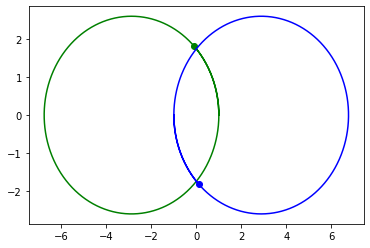

In [9]:
#Graficamos la trayectoria de los cuerpos primarios
plt.plot(out[:,0],out[:,1], color ='g')
plt.plot(out[-1,0],out[-1,1], 'go')
plt.plot(out[:,3],out[:,4], color ='b')
plt.plot(out[-1,3],out[-1,4], 'bo')

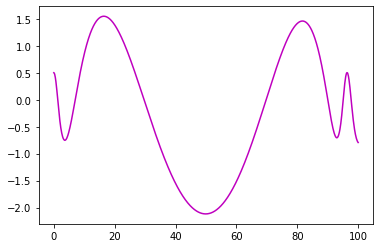

In [10]:
plt.plot(t,out[:,8], color ='m' ) #graficamos la trayectoria del tercer cuerpo, que oscila en el eje z

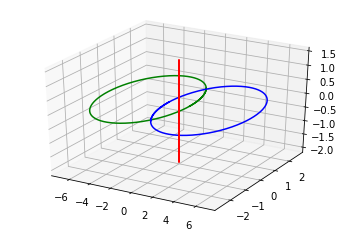

In [11]:
ax = plt.axes(projection='3d') #graficamos en tercera dimensión

zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(out[:,0],out[:,1], out[:,2], 'green') #primer cuerpo
ax.plot3D(out[:,3],out[:,4], out[:,5], 'blue') #segundo cuerpo
ax.plot3D(out[:,6],out[:,7], out[:,8], 'red') #tercer cuerpo

In [12]:
#importamos paqueterias
from mpl_toolkits.mplot3d import Axes3D #graficar en 3D
from matplotlib import animation, rc #animación de los tres cuerpos
from IPython.display import HTML #reproducir como archivo de python
%matplotlib inline

In [13]:
#variable del primer cuerpo
trayectorias=[]
trayectorias.append([out[:,0],out[:,1], out[:,2]])

In [14]:
#varibale del segundo cuerpo
trayectorias2=[]
trayectorias2.append([out[:,3],out[:,4], out[:,5]])

In [15]:
#varible del tercer cuerpo
trayectorias3=[]
trayectorias3.append([out[:,6],out[:,7], out[:,8]])

In [16]:
%%capture

#definimos los valores de posición para los tres cuerpos
x=np.array(trayectorias[0][0])
y=np.array(trayectorias[0][1])
z=np.array(trayectorias[0][2])

x2=np.array(trayectorias2[0][0])
y2=np.array(trayectorias2[0][1])
z2=np.array(trayectorias2[0][2])

x3=np.array(trayectorias3[0][0])
y3=np.array(trayectorias3[0][1])
z3=np.array(trayectorias3[0][2])

#variable para graficar
fig = plt.figure()
fig = plt.figure(figsize=(8,8))

ax = fig.add_axes([0, 0, 1, 1], projection='3d')

ax.set_xlim((-6.5, 6.5))
ax.set_ylim((-2.5, 2.5))
ax.set_zlim((-2, 1.5))

#A partir se toman variables para la animación
line, = ax.plot([], [],[],'r-')
particle, = ax.plot([], [], [], 'r.', markersize=10.0)
plt.gca().set_aspect('equal', adjustable='box')

line2, = ax.plot([], [],[],'b-')
particle2, = ax.plot([], [], [], 'b.', markersize=10.0)
plt.gca().set_aspect('equal', adjustable='box')

line3, = ax.plot([], [],[],'g-')
particle3, = ax.plot([], [], [], 'g.', markersize=10.0)
plt.gca().set_aspect('equal', adjustable='box')

def init_2():
    line.set_data([], [])
    line.set_3d_properties([])
    particle.set_data([],[])
    particle.set_3d_properties([])
    
    line2.set_data([], [])
    line2.set_3d_properties([])
    particle2.set_data([],[])
    particle2.set_3d_properties([])
    
    line3.set_data([], [])
    line3.set_3d_properties([])
    particle3.set_data([],[])
    particle3.set_3d_properties([])
    return particle, particle2, particle3

def animate_2(i):
    line.set_data(x[:i], y[:i])
    line.set_3d_properties(z[:i])
    particle.set_data(x[i],y[i])
    particle.set_3d_properties(z[i])
    ax.view_init(30, 0.3 * 2*i)
    
    
    line2.set_data(x2[:i], y2[:i])
    line2.set_3d_properties(z2[:i])
    particle2.set_data(x2[i],y2[i])
    particle2.set_3d_properties(z2[i])
    ax.view_init(30, 0.3 * 2*i)
    
    line3.set_data(x3[:i], y3[:i])
    line3.set_3d_properties(z3[:i])
    particle3.set_data(x3[i],y3[i])
    particle3.set_3d_properties(z3[i])
    ax.view_init(30, 0.3 * 2*i)
    return particle, particle2, particle3

pelicula=animation.FuncAnimation(fig, animate_2, init_func=init_2,
                            frames=len(t), interval=60, blit=True)

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

In [17]:
HTML(pelicula.to_html5_video()) #crea animación

NameError: name 'pelicula' is not defined

# Se intentó exprimentar con la animación

In [18]:
import matplotlib.animation as animation
from IPython.display import HTML

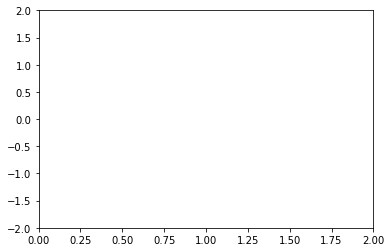

In [19]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [20]:
def init():
    line.set_data([], [])
    return (line,)

In [21]:
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [22]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [23]:
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available